## **Open API 활용(json)**

In [ ]:
import urllib.request
import json

def searchbook(title):
  client_id = "************"
  client_secret = "*********"

  url = "https://openapi.naver.com/v1/search/book.json"
  option = "&display=3&sort=count"
  query = "?query="+urllib.parse.quote(title)

  url_query = url + query + option #https://openapi.naver.com/v1/search/book.json?query=[입력내용]&display=3&sort=count

  request = urllib.request.Request(url_query)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)

  #Open API 요청
  response = urllib.request.urlopen(request) #request에 맞게 웹 서버에 요청하면 응답으로 response를 되돌려 줍니다.
  rescode = response.getcode()

  if(rescode==200):#성공
    response_body = response.read()
    return response_body.decode('utf-8')
  else:
    return None


In [ ]:
def showitem(item):
  print("제목:"+item['title'])
  print("설명:"+item['description'])
  print("url:"+item['link'])

In [ ]:

res = searchbook(input("질의:"))
if(res==None):
   print("검색 실패")
else:
  jres = json.loads(res)  
  if(res==None):
   print("json.loads 실패")
  else:
    for post in jres["items"]:
      showitem(post)


질의:python
제목:Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑하게 코딩하는 법, 개정판)
설명:아마존 파이썬 프로그래밍 분야 베스트셀러, 〈Effective <b>Python</b>〉 전면 개정 증보판! 
파이썬의 매력과 강점을 이용해 강력하고 우수한 성능의 코드를 작성하는 90가지 방법!
파이썬다운 방식으로 프로그램을 작성하는 방법, 파이썬을 사용하는 가장 좋은 방법에 대한 통찰을 담았다! 2판에서는 파이썬 3.... 
url:http://book.naver.com/bookdb/book_detail.php?bid=16876960
제목:파이썬 딥러닝 파이토치(<b>Python</b> Deep Learning PyTorch)
설명:파이썬은 선택이 아닌 필수! 파이토치로 딥러닝 입문하기!이 책은 딥러닝 기술에 초점을 두고 딥러닝을 구현하기 위해 파이썬을 이용하는데, 머신러닝 라이브러리인 파이토치를 활용하여 다양한 텐서를 지원하는 방법을 알아본다. 파이토치는 파이썬 코딩과 비슷하기 때문에 언어가 어렵지 않다.... 
url:http://book.naver.com/bookdb/book_detail.php?bid=16778336
제목:AI 수학 with <b>Python</b>(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)
설명:인공지능을 공부하는데 필요한 기초 수학개념을 한 권에 모았다!〈처음 만나는 AI 수학 WITH <b>PYTHON</b>〉은 인공지능을 공부하는데 기본이 되는 수학 개념을 소개하는 도서로 독자가 수학을 잘 하도록 만드는 것이 아니라 필요한 개념을 이해하도록 돕는데 목적을 두고 있다.

이 책에서는 AI의 기본이 되는 선형대수... 
url:http://book.naver.com/bookdb/book_detail.php?bid=17799511


##**Open API활용(XML)**

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
def searchbook2(title):
    client_id = "YQamMsttnCdo2R9gfI69"
    client_secret = "oy3GJhYfyg"
    #쿼리 문자열: 사이트주소?인자명=값&인자명=값...
    url = "https://openapi.naver.com/v1/search/book.xml"

    option = "&display=10&sort=count"

    query = "?query="+ urllib.parse.quote(title)

    url_query = url + query + option

    request = urllib.request.Request(url_query)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode != 200):
        return None
    else:
        return response.read().decode('utf-8')

In [ ]:
def showitem2(item):
    print("<<<<=======")
    print("제목:"+ item.title.get_text())
    print("설명:"+ item.description.get_text())
    print("<<<<=======")

In [ ]:
def makeexcel(items, path):
    result=[]
    for item in items:
        result.append([item.title.get_text]+[item.description.get_text])
    table = pd.DataFrame(result,columns=('title','description'))
    table.to_excel(path)

In [ ]:
title = input("제목:")
res = searchbook2(title)
if(res==None):
    print("검색 실패!!")
else:
    xmlsoup = BeautifulSoup(res, 'html.parser')
    items = xmlsoup.find_all('item')
    for item in items:
        showitem2(item)
    makeexcel(items,"data.xlsx")

제목:행복
<<<<=======
제목:완전한 <b>행복</b> (정유정 장편소설)
설명:《완전한 <b>행복</b>》으로 돌아왔다. 500여 쪽을 꽉 채운 압도적인 서사와 적재적소를 타격하는 속도감... 《완전한 <b>행복</b>》은 버스도 다니지 않는 버려진 시골집에서 늪에 사는 오리들을 먹이기 위해 오리... 얼굴을 맞대고 웃고 있지만 그들이 추구하는 서로 다른 <b>행복</b>은 서서히 불협화음을 만들어낸다. 이 기묘한... 
<<<<=======
<<<<=======
제목:곰돌이 푸, <b>행복</b>한 일은 매일 있어 (아직 <b>행복</b>을 기다리는 우리에게)
설명:이 책 『곰돌이 푸, <b>행복</b>한 일은 매일 있어』는 곰돌이 푸의 긍정적인 기운과 ‘나의 삶은 나의 방식으로 정한다’라고 말했던 독일의 철학자 니체의 말... <b>행복</b>은 여전히 먼 곳에 있고, 나는 어떤 사람인지, 나는 무엇을 할 때 <b>행복</b>했는지에 대한 기억도 점차 흐려져 오늘도 ‘<b>행복</b>’을 찾는 일이 영 요원하게... 
<<<<=======
<<<<=======
제목:법륜 스님의 <b>행복</b> (<b>행복</b>해지고 싶지만 길을 몰라 헤매는 당신에게)
설명:당신은 <b>행복</b>해질 권리가 있다법륜 스님은 지난 30년 동안 우리나라 전국방방곡곡은 물론 세계 115개 도시의 강연장과 길 위에서 수많은 사람들을 만나왔다.... 일견 다 다른 질문 같지만 자세히 들여다보면 문제는 결국 ‘<b>행복</b>’이다.

『법륜 스님의 <b>행복</b>』은 그 간절한 물음에 대한 응답이다. 수많은 사람들이... 
<<<<=======
<<<<=======
제목:꾸뻬 씨의 <b>행복</b> 여행
설명:진정한 <b>행복</b>을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별한 <b>행복</b>론 『꾸뻬 씨의 <b>행복</b> 여행』. 현대인의 우울한 마음의 원인을 진단하는 책들을 펴내며 작가로서도 명성을 얻고 있던 정신과 전문의 프랑수아

## **도표 그리기**

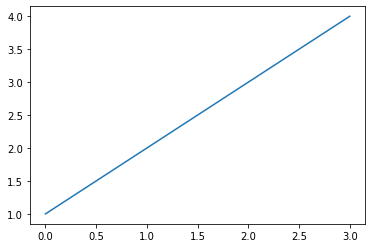

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.show()

plot([x],y)

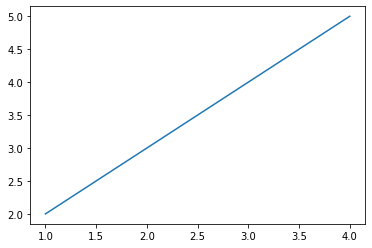

In [ ]:
plt.plot([1,2,3,4],[2,3,4,5])
plt.show()

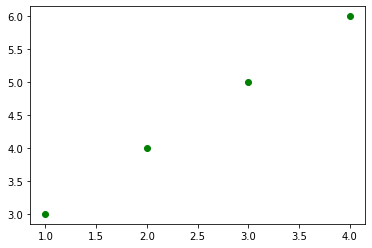

In [ ]:
plt.plot([1,2,3,4],[3,4,5,6],'go') #g:green o:점으로 표현
plt.show()

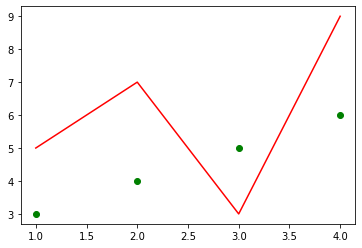

In [ ]:
plt.plot([1,2,3,4],[3,4,5,6],'go',[1,2,3,4],[5,7,3,9],'r')

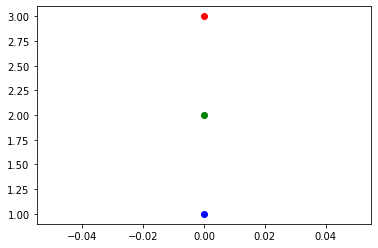

In [ ]:
plt.plot([1],'bo',[2],'go',[3],'ro')

## **Pandas Series**

In [ ]:
import pandas as pd
scores=[85,34,65,78,94]

ps1 = pd.Series(scores)
ps1

0    85
1    34
2    65
3    78
4    94
dtype: int64

In [ ]:
x_list=[1,2,3,4]
y_list=[10,90,44,23]
df = pd.DataFrame([x_list,y_list])df

    0   1   2   3
0   1   2   3   4
1  10  90  44  23
0        [1, 2, 3, 4]
1    [10, 90, 44, 23]
dtype: object


헤더

In [ ]:
rh = ["번호","점수"]
df2 = pd.DataFrame([x_list,y_list], index =rh)
df2

,0,1
번호,1,90
점수,2,80


In [ ]:
rh = ["번호","점수"]
x_list=[1,90]
y_list=[2, 80]
df3 = pd.DataFrame([x_list,y_list], columns =rh)
df3

,번호,점수
0,1,90
1,2,80


In [ ]:
name = ['홍길동','을지문덕','강감찬']
ages = [20,40,45]

td = {
    '이름':name,
    '나이':ages
}
df4 = pd.DataFrame(td)
df4

Index(['이름', '나이'], dtype='object')

In [ ]:
print(df4.index)
print(df4.columns)
print(df4.values)

RangeIndex(start=0, stop=3, step=1)
Index(['이름', '나이'], dtype='object')
[['홍길동' 20]
 ['을지문덕' 40]
 ['강감찬' 45]]


## **Pandas(빈 DataFrame)**

In [ ]:
edf = pd.DataFrame(columns=range(5)) #DataFrame 스키마 정의
edf

,0,1,2,3,4


In [ ]:
edf.loc[0]=[1,2,3,4,5] #DataFrame 개체에 데이터 추가
edf

,0,1,2,3,4
0,1,2,3,4,5
2,1,2,3,4,5
1,1,2,3,4,5


In [ ]:
edf2 = pd.DataFrame(columns=range(5)) #DataFrame 스키마 정의
edf2

,0,1,2,3,4


In [ ]:
edf2.loc[0]=[11,12,13,14,15] #DataFrame 개체에 데이터 추가
edf2

,0,1,2,3,4
0,11,12,13,14,15


In [ ]:
edf3=edf.append(edf2)
edf3

,0,1,2,3,4
0,1,2,3,4,5
2,1,2,3,4,5
1,1,2,3,4,5
0,11,12,13,14,15


In [ ]:
edf4 = pd.DataFrame([[6],[16]],columns=range(5,6))
edf4

,5
0,6
1,16


In [ ]:
edf5 = edf3.join(edf4)
edf5

,0,1,2,3,4,5
0,1,2,3,4,5,6.0
0,11,12,13,14,15,6.0
1,1,2,3,4,5,16.0
2,1,2,3,4,5,NaN


In [ ]:
edf5.index = range(1,5)
edf5.columns = range(1,7)
edf5

,1,2,3,4,5,6
1,1,2,3,4,5,6.0
2,11,12,13,14,15,6.0
3,1,2,3,4,5,16.0
4,1,2,3,4,5,NaN


In [ ]:
edf5.rename(index={2:6},inplace=True)
edf5.rename(index={4:8},inplace=True)
edf5

,1,2,3,4,5,6
1,1,2,3,4,5,6.0
6,11,12,13,14,15,6.0
3,1,2,3,4,5,16.0
8,1,2,3,4,5,NaN


In [ ]:
edf5.rename(columns={6:7},inplace=True)
edf5

,1,2,3,4,5,7
1,1,2,3,4,5,6.0
6,11,12,13,14,15,6.0
3,1,2,3,4,5,16.0
8,1,2,3,4,5,NaN


In [ ]:
import numpy as np
edf5[6]=np.nan
edf5

,1,2,3,4,5,7,6
1,1,2,3,4,5,6.0,NaN
6,11,12,13,14,15,6.0,NaN
3,1,2,3,4,5,16.0,NaN
8,1,2,3,4,5,NaN,NaN


In [ ]:
!echo "# DeepFake_study" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/SongSiWoon/DeepFake_study.git
!git push -u origin main


Reinitialized existing Git repository in /gdrive/My Drive/Study_DeapFake/.git/
[main 568bc4f] first commit
 1 file changed, 1 insertion(+)
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
Sedf6 = edf5.reindex(index=[1,2,6,4])
edf6

,1,2,3,4,5,7,6
1,1,2,3,4,5,6.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,12,13,14,15,6.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
edf7 = edf6[list(range(1,8))]
edf7

,1,2,3,4,5,6,7
1,1,2,3,4,5,NaN,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,12,13,14,15,NaN,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
from os.path import join
from google.colab import drive

ROOT='/content/drive'
drive.mount(ROOT)

Mounted at /content/drive


In [11]:
PROJ = "/drive/'My Drive'/'Study_DeapFake'"
PROJ_PATH=join(ROOT,PROJ)

In [12]:
import os
import sys

sys.path.insert(0, PROJ_PATH)

In [13]:
import os
import sys

sys.path.insert(0, PROJ_PATH)

In [14]:
%cd /content/drive/'My Drive'/'Study_DeapFake'

/content/drive/My Drive/Study_DeapFake


In [15]:
!pwd

/content/drive/My Drive/Study_DeapFake


In [16]:
!git init

Initialized empty Git repository in /content/drive/My Drive/Study_DeapFake/.git/


In [ ]:
!git config --global user.email "siwoons7319@gmail.com"
!git config --global user.name "SongSiWoon"